In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
### We can import the data set in another way via a downloaded csv file in the same Dir as this Jupyter kernel (program file)
### The dataframe name is now df
df = pd.read_csv('california_housing.frame.csv')

### There is an aberration in the large spikes of up to 1200 occupants per household in the original data set. 
### These could be incorrectly notated. We delete 37 such records with AveOccup > 10
df = df[~(df['AveOccup'] >= 10.0)] 

df=df.iloc[:,1:10]

In [8]:
df.to_excel("housing.xlsx")

In [3]:
df.head()
### This returns the first 5 rows of the dataframe df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
np.shape(df)
### This returns the dimension of the tabular dataframe, i.e. 506 rows of data without variable names, 15 columns excepting index

(20603, 9)

In [5]:
# Let's summarize the data to see the distribution of data
print(df.describe())
### The behaviour of describe() is different with series of strings. giving count of values, top and freq of occurrence

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20603.000000  20603.000000  20603.000000  20603.000000  20603.000000   
mean       3.870548     28.637092      5.428533      1.096540   1423.339368   
std        1.897012     12.580805      2.471073      0.473866   1128.241516   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.564350     18.000000      4.440829      1.006135    787.000000   
50%        3.534900     29.000000      5.229682      1.048749   1166.000000   
75%        4.743850     37.000000      6.052108      1.099418   1724.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20603.000000  20603.000000  20603.000000  20603.000000  
mean       2.918517     35.631012   -119.569189      2.069010  
std        0.765234      2.135875      2.003460      1.153654  
min        0.692308     32.54000

In [6]:
df.isnull().sum()  
### this is to check if there is any missing data in the index and other columns -- none or '0'

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20603 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20603 non-null  float64
 1   HouseAge     20603 non-null  float64
 2   AveRooms     20603 non-null  float64
 3   AveBedrms    20603 non-null  float64
 4   Population   20603 non-null  float64
 5   AveOccup     20603 non-null  float64
 6   Latitude     20603 non-null  float64
 7   Longitude    20603 non-null  float64
 8   MedHouseVal  20603 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


Data descriptions. sklearn download. 1990 US Census. 20640 samples (sample units) each of which is a residential block in California. \
Target: MedHouseVal -- median house value in block, in USD100,000\
Features:\
MedInc --median of households in block, in $10,000\
HouseAge -- in years\
AveRooms -- average no. of rooms (all 'rooms') per household in block\
AveBedrms -- average no. of bedrooms per household in block\
Population -- total no. of occupants in block\
AveOccup -- average no. of occupants per household in block\
Longitudes -- smaller implies closer to sea

In [8]:
### MedHouseVal is censored at 5, i.e. numbers above 5 are reported as 5. This number is therefore inaccurate. Remove these.
df = df[~(df['MedHouseVal'] >= 5.0)] 
print(np.shape(df)) 

(19615, 9)


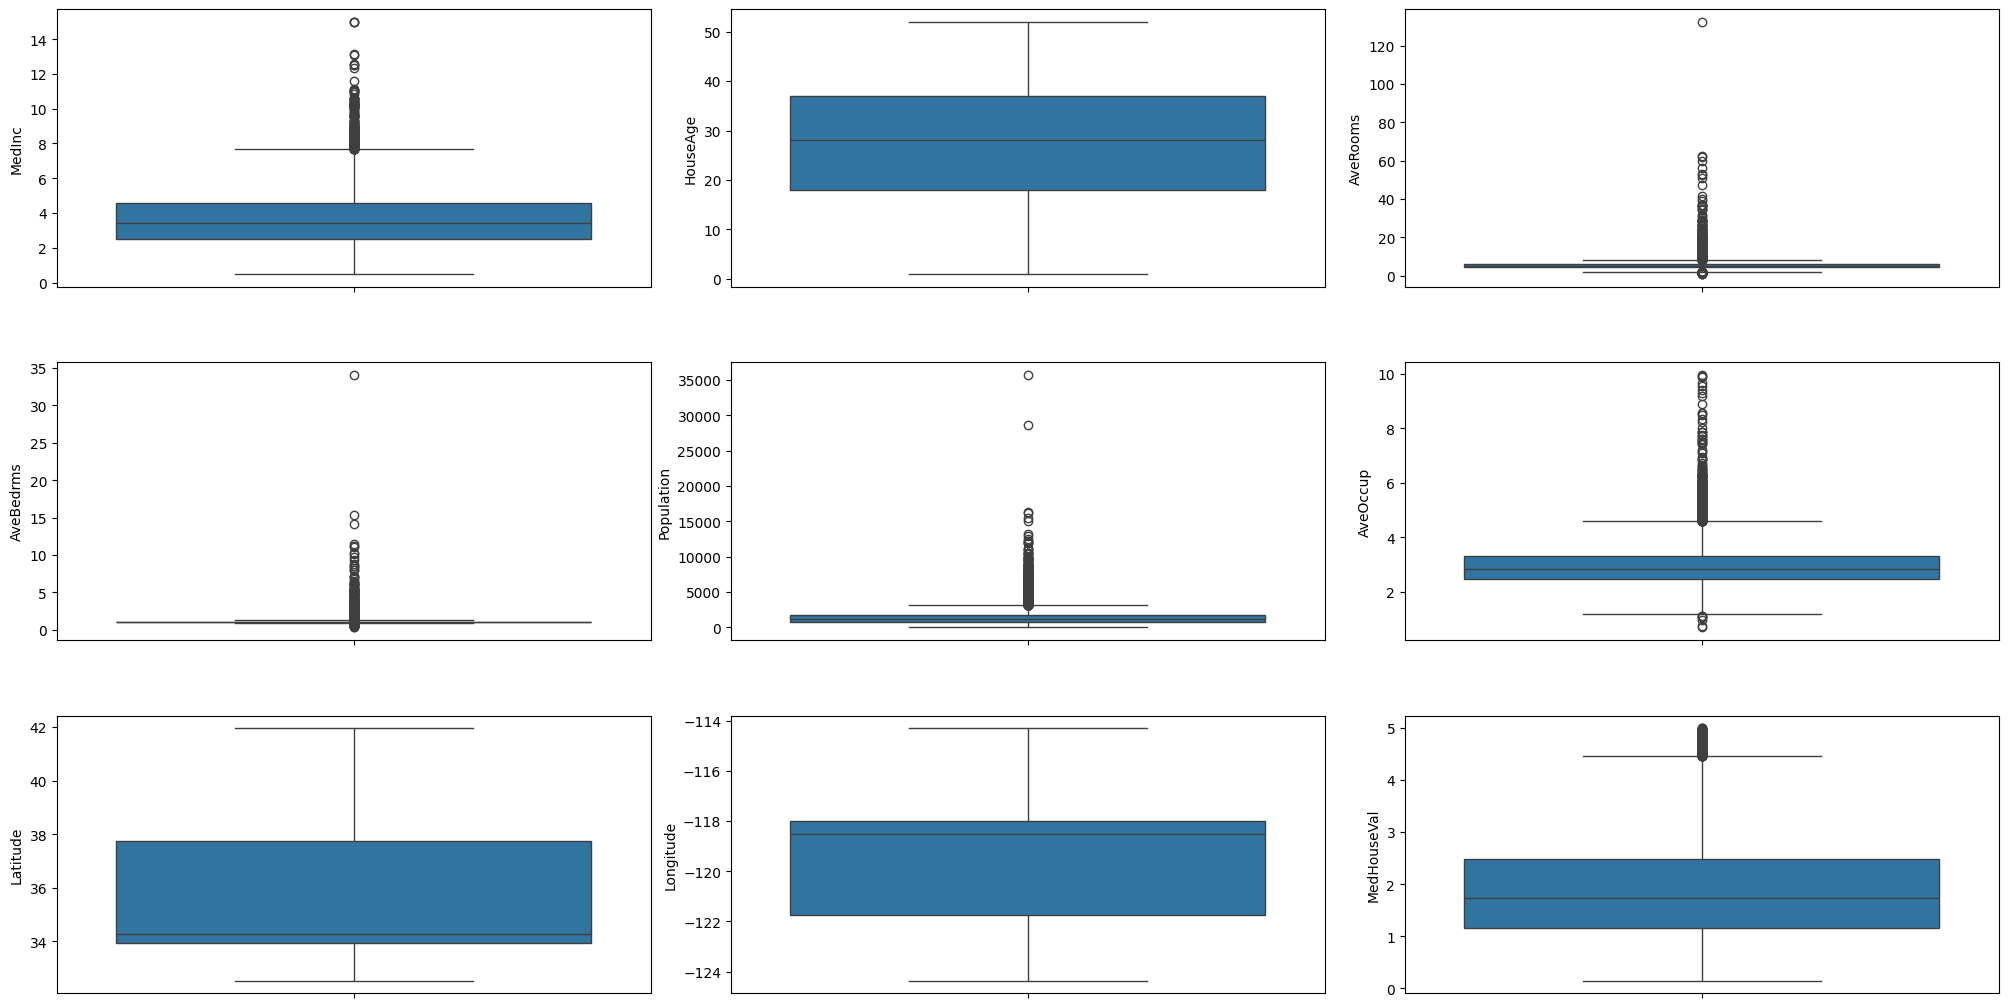

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():               
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
### In the boxplot, centerline is mean, upper and lower box edges are the 75th and 25th percentiles. 
### Whiskers connect to "max" [75% + 1.5* interquartile range IQR] and "min" [25% - 1.5* IQR] (shorter horizontal lines)
### Outliers are shown as dots outside the whiskers. 
### See also https://seaborn.pydata.org/generated/seaborn.boxplot.html

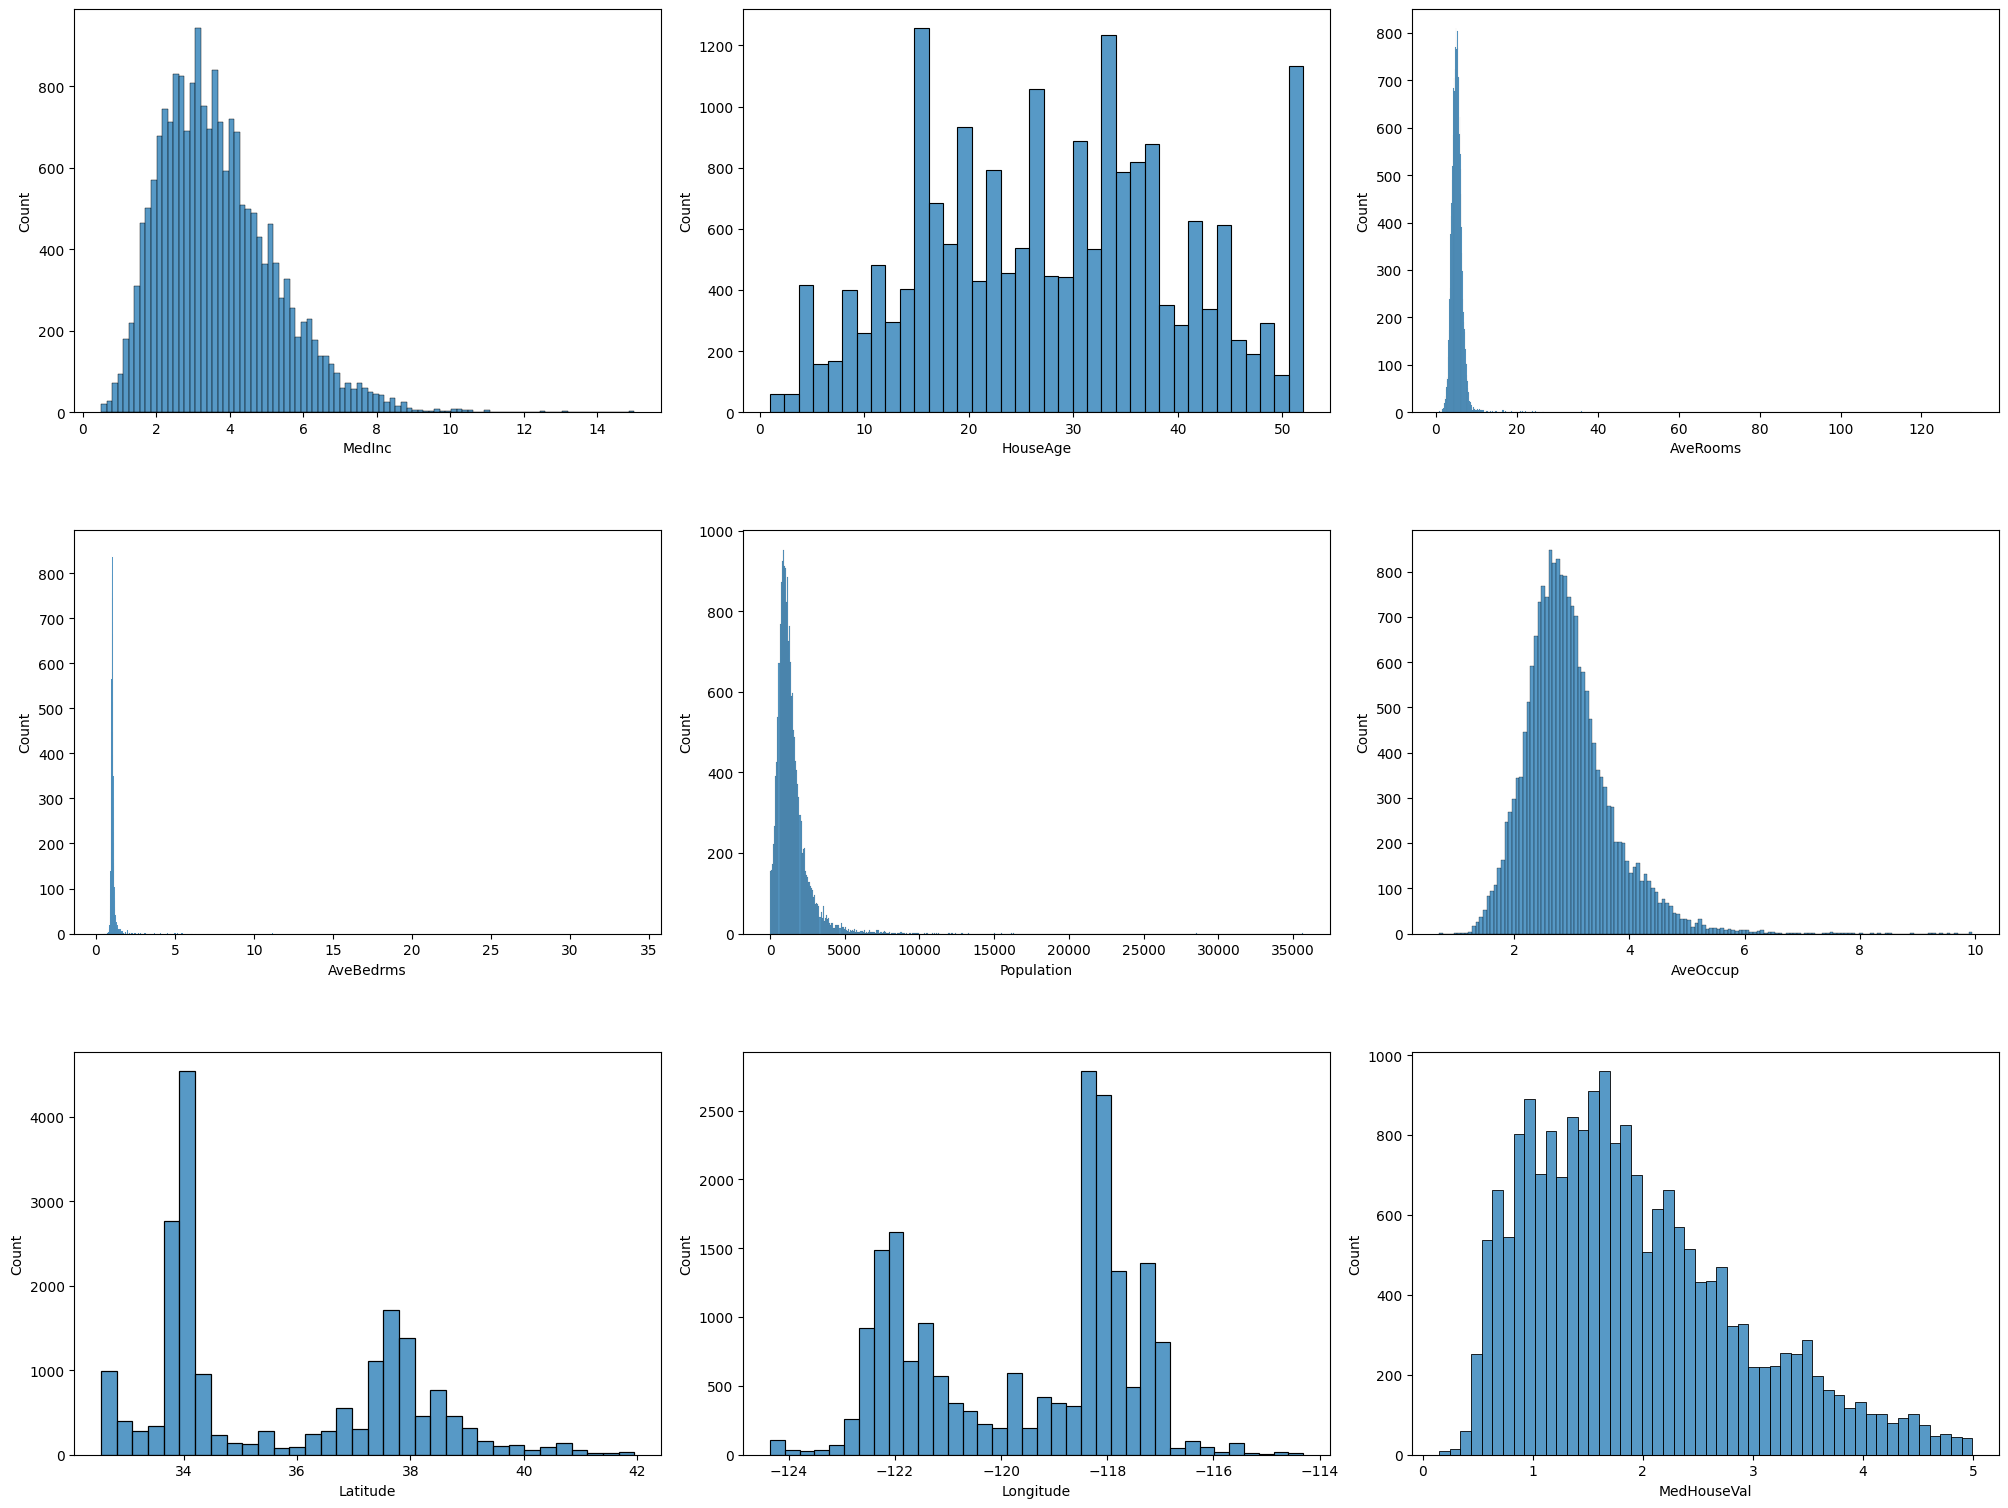

In [10]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in df.items():
   sns.histplot(v, ax=axs[index])
   index += 1 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
### uses seaborn

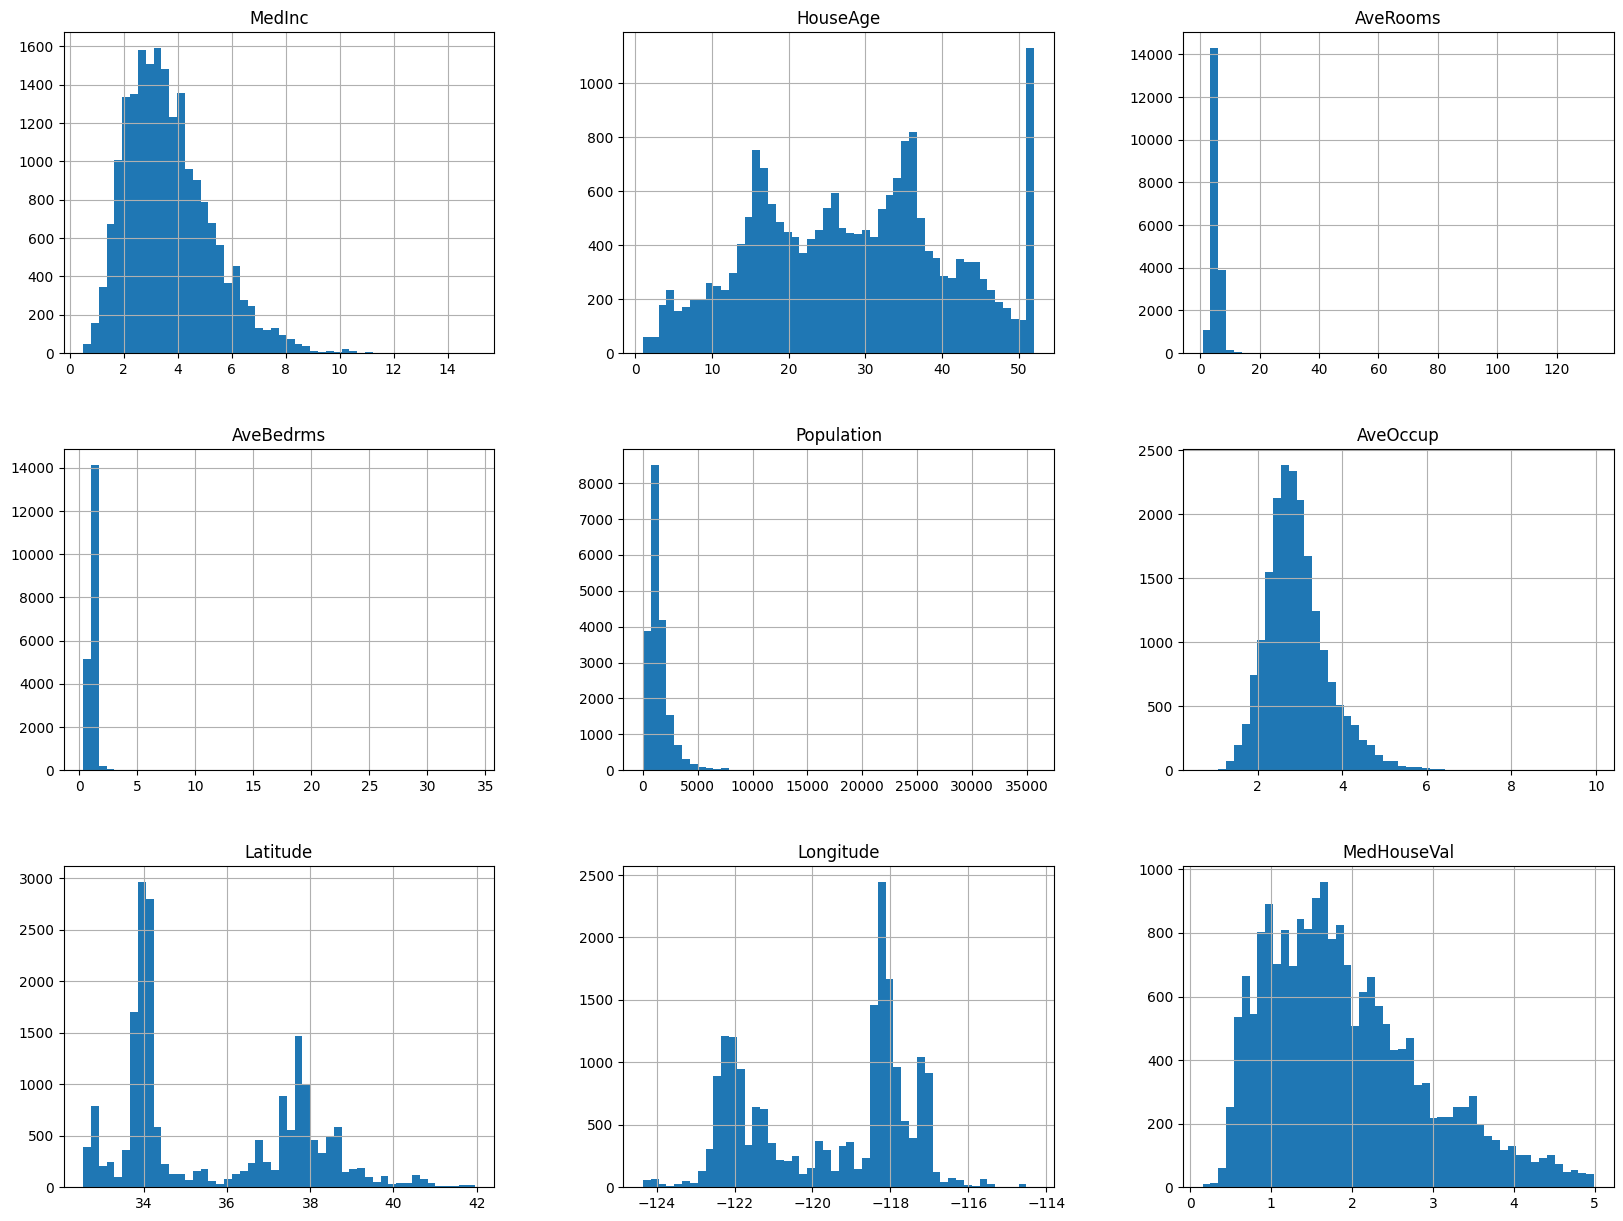

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig('California_housing_histogram_plots')
plt.show()
### compare matplotlib histogram

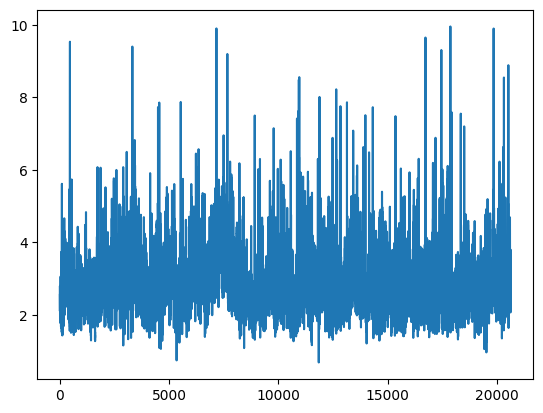

In [12]:
df['AveOccup'].plot()
plt.show()


<Axes: >

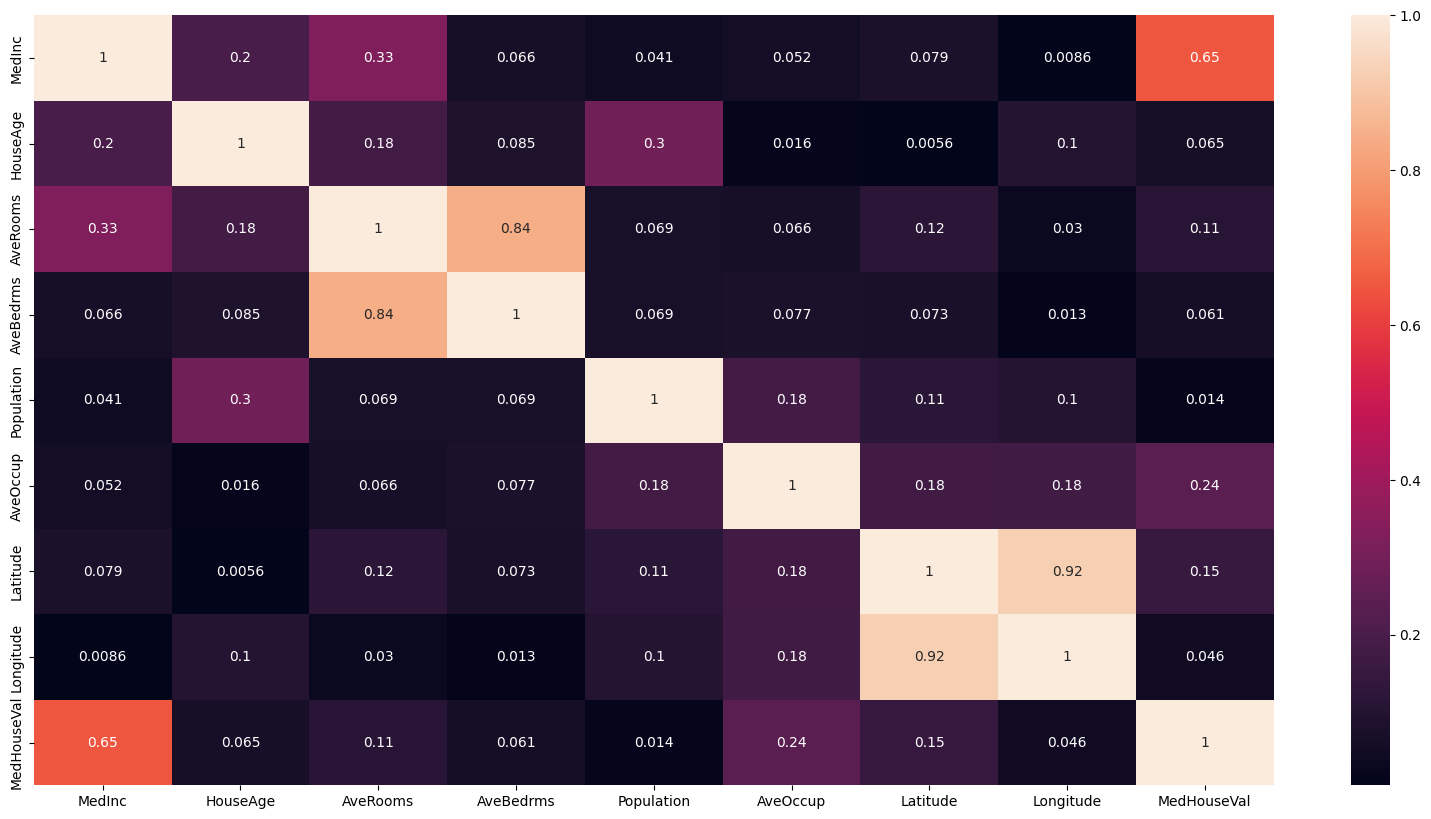

In [13]:
### pairwise correlation on the features including medv
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)
### In heat map, clearly tax and rad are highly correlated
### For more options - see https://seaborn.pydata.org/generated/seaborn.heatmap.html

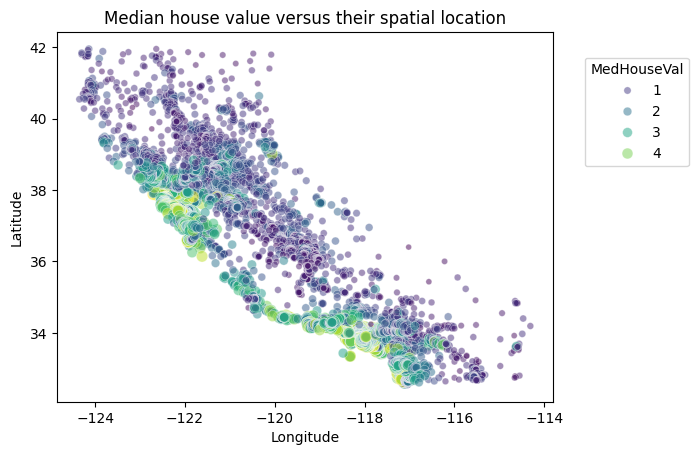

In [14]:
import seaborn as sns
sns.scatterplot(data=df, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",  ###size is grouping variable, hue is order of proecessing
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value versus their spatial location")
### key shows MedHouseVal in ranges (1) 0-1, (2) 1-2, (3) 2-3, (4), > 3

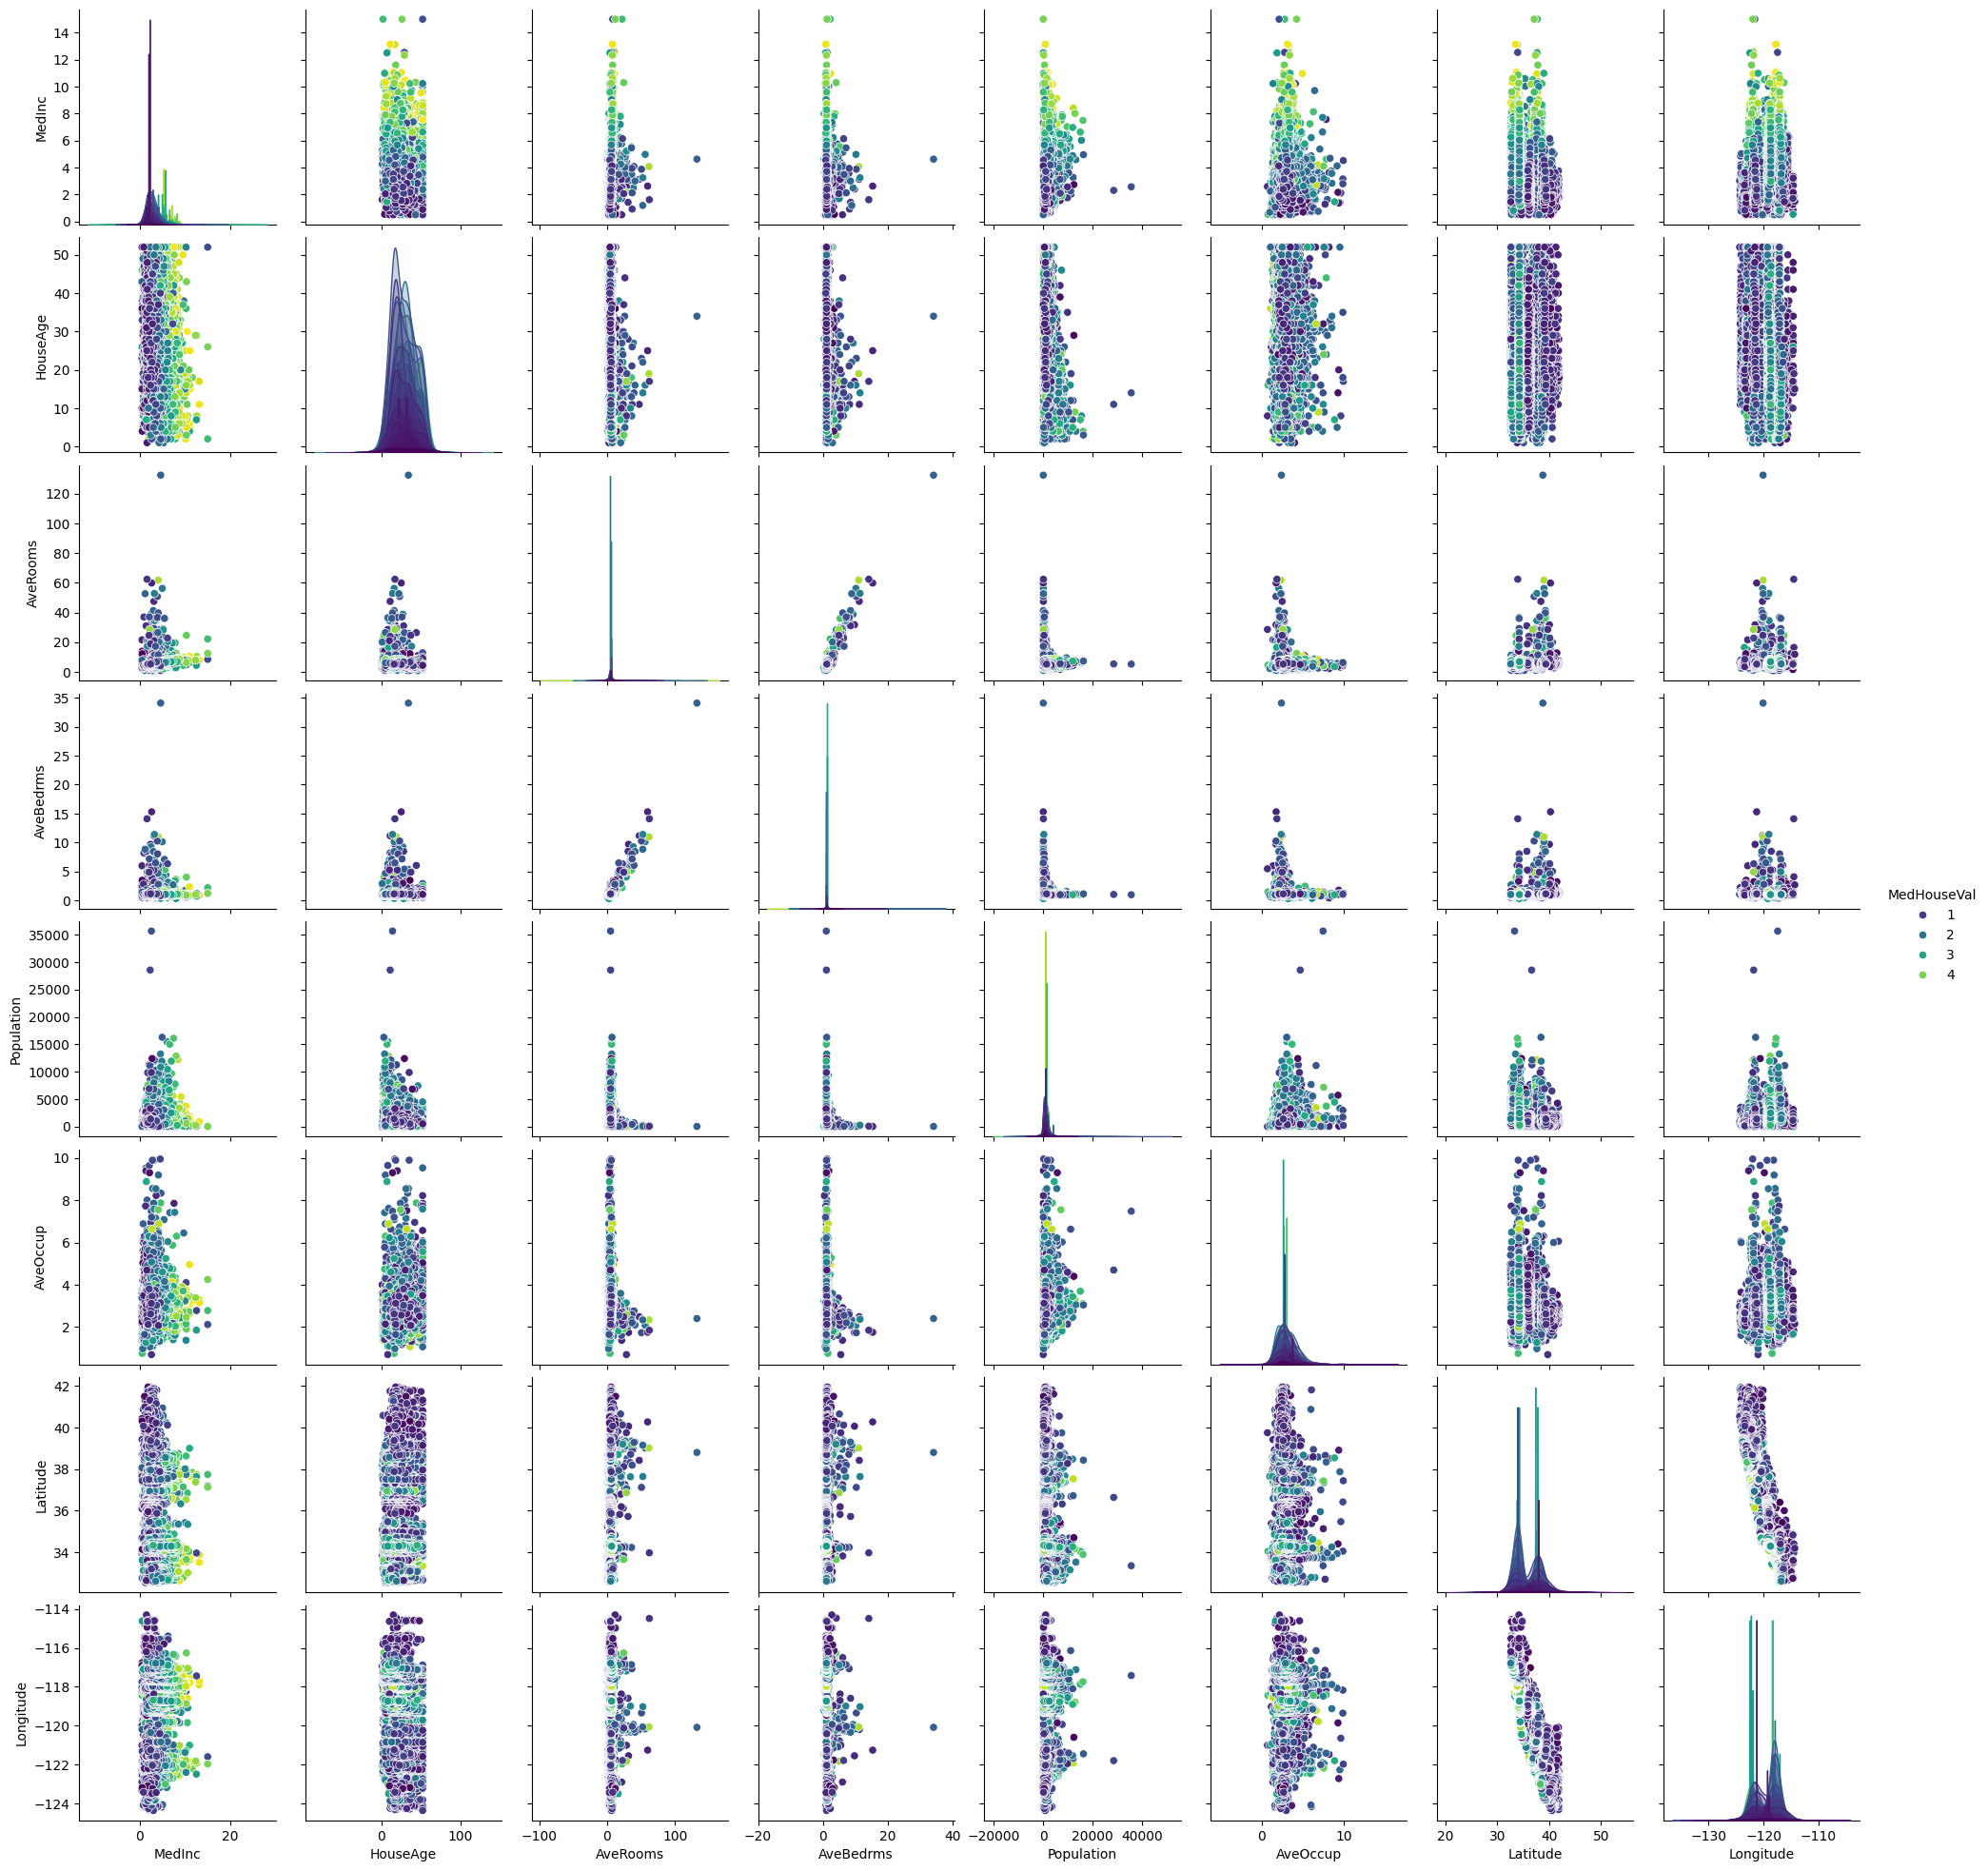

In [15]:
import pandas as pd
sns.pairplot(data=df, hue="MedHouseVal", palette="viridis")
### each diagram is one feature on y-axis vs another feature on x-axis with color code of MedHouseVal at the y-x values
### for y-axis, x-axis of same feature, diagram shows histogram but associated MedHouseVal with x-axis

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


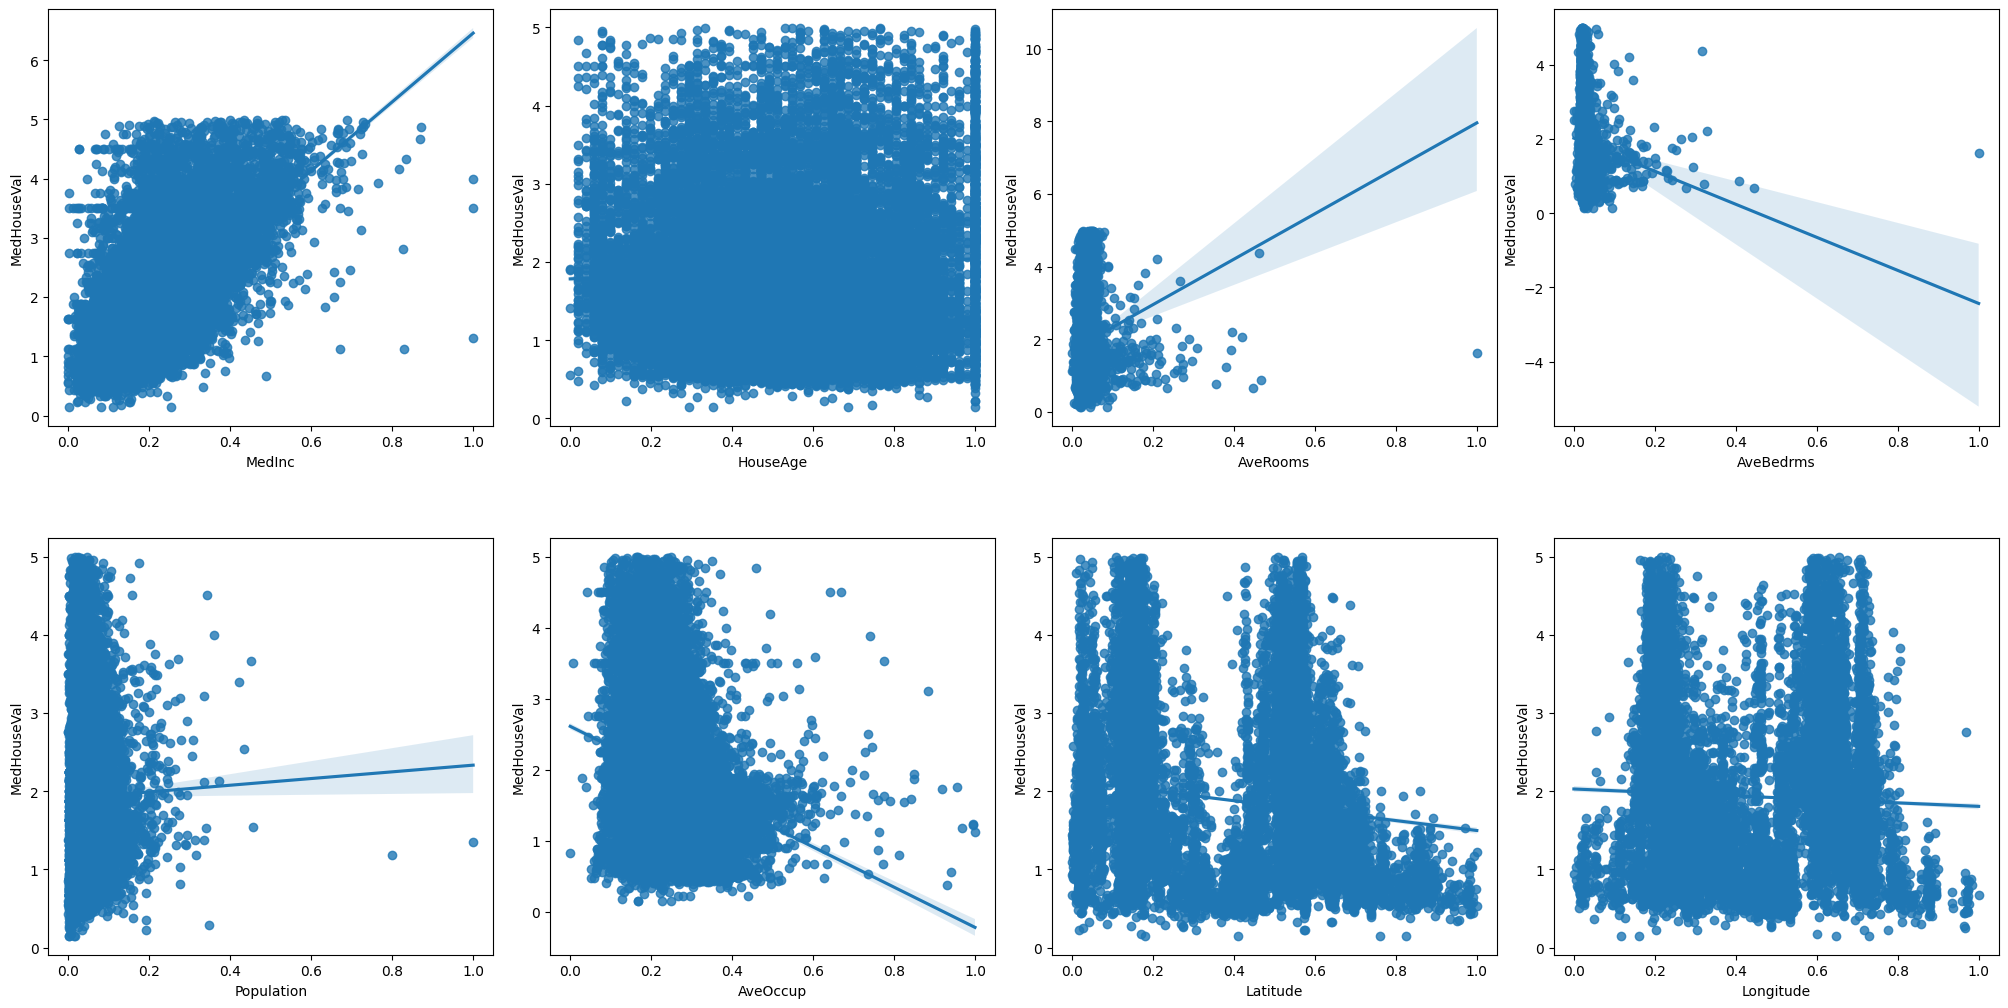

In [17]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MedHouseVal
min_max_scaler = preprocessing.MinMaxScaler()
### x is now transformed via min_max_scaler as (X - X.min) / (X.max - X.min)
column_sels = ['MedInc','HouseAge', 'AveRooms', 'AveBedrms','Population', 'AveOccup', 'Latitude','Longitude'] 
### Note varnames must be in exact small or cap letters
### Features are included in order of their pairwise correlation with MedHouseVal
X = df.loc[:,column_sels]
y = df['MedHouseVal']
X = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()  ## returns flatted version of array
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=X[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
### Note: sns.pairplot(dataset); plt.show() would produce plots of all pairs
### In seaborn here, ax in sns.regplot refers to Axes object to draw the plot onto


In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50) 
### test_size here is 20%; random state number is a seed number -- diff seed produces diff random draws
### note 0.2*19615 = 3923 (or closest to an integer). 0.8*19615 = 15,692.
### X_train, y_train each has 15,692 rows. 
### X_test, y_test each has 3923 rows
### Latter can be checked using print(len(y_test))
print(len(X_train),len(y_train),len(X_test),len(y_test))

15692 15692 3923 3923


In [19]:
### see module documentation in https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
### LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
### copy_X=True -- X will be copied; else, it may be overwritten.
### if fit_intercept = False, intercept will be set to 0.0
### n_jobs=None (same as  = 1), i.e. no use of additional parallel processors
### normalize=False: ignored when fit_intercept is set to False. 
### If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. 
### If you wish to standardize, one could use StandardScaler before calling fit on an estimator with normalize=False.

from sklearn.linear_model import LinearRegression
Linreg = LinearRegression()  
Linreg.fit(X_train, y_train) ###training the algorithm, note regression is done without normalizing the X, y
### To retrieve the intercept:
print('Intercept (train):', Linreg.intercept_)
### To retrieving the slope:
print('Slopes (train):', Linreg.coef_)

from sklearn.metrics import r2_score
y_pred_Linreg_train = Linreg.predict(X_train)
### Fitting y using the x_train data
r2_score_Linreg_train = r2_score(y_train, y_pred_Linreg_train)

print('R2_score (train): ', r2_score_Linreg_train)
### R2_score (train) is the R-square in the linear regression involving only the training data set

Intercept (train): 4.077726011109197
Slopes (train): [  5.91059822   0.46819653 -10.58017655  15.28770265   1.30115905
  -2.65806525  -3.69542188  -3.92228473]
R2_score (train):  0.6203540883823073


In [20]:
from sklearn.metrics import mean_squared_error
### Predicting RMSE -- the Training set results
rmse_Linreg_train = (np.sqrt(mean_squared_error(y_train, y_pred_Linreg_train)))
print("RMSE: ", rmse_Linreg_train)

RMSE:  0.5974983971900051


In [21]:
### Check the R2_score(train) another way
import numpy as np
def tss(y_train):
    return ((y_train - np.mean(y_train))**2).sum()
1-(15692*(rmse_Linreg_train)**2)/tss(y_train)  ### note that rmse in Linreg divides into N, not N-k

0.6203540883823073

In [22]:
### Predicting R2 Score using Test Set but Intercept(train) and Slopes(train) from Training results
y_pred = Linreg.intercept_ + np.dot(X_test,Linreg.coef_.T)
rmse_y_pred = (np.sqrt(mean_squared_error(y_test, y_pred)))
def tss(y_test):
    return ((y_test - np.mean(y_test))**2).sum()
R2_pred=1-(3923*(rmse_y_pred)**2)/tss(y_test)
print("Pred_RMSE:",rmse_y_pred)
print("R2_pred:",R2_pred)

Pred_RMSE: 0.6012841104200348
R2_pred: 0.6213764009165903


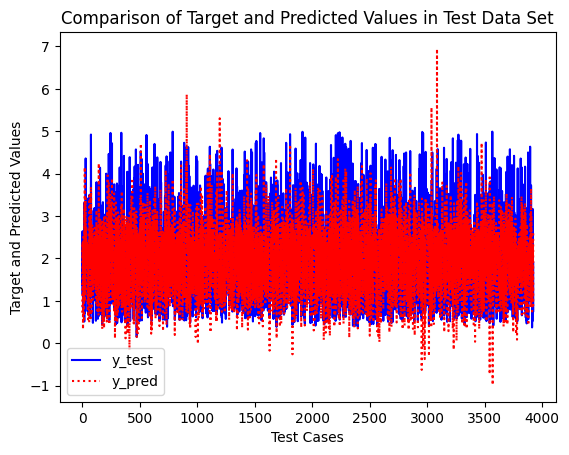

In [23]:
import matplotlib.pyplot as plt
d = np.linspace(1, 3923, 3923)
### creates t ranging from values 1 to 3930 with number of points (3rd argument) as 3930

plt.plot(d, y_test, 'blue', linestyle='solid') ### plotting d, y_test separately 
plt.plot(d, y_pred, 'red', linestyle='dotted') ### plotting t, y_pred separately 
plt.xlabel('Test Cases')
plt.ylabel('Target and Predicted Values')
plt.title('Comparison of Target and Predicted Values in Test Data Set')
plt.legend(["y_test", "y_pred"], loc ="lower left")
plt.show()
### See linestyles in https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
### See also https://matplotlib.org/2.0.2/users/pyplot_tutorial.html

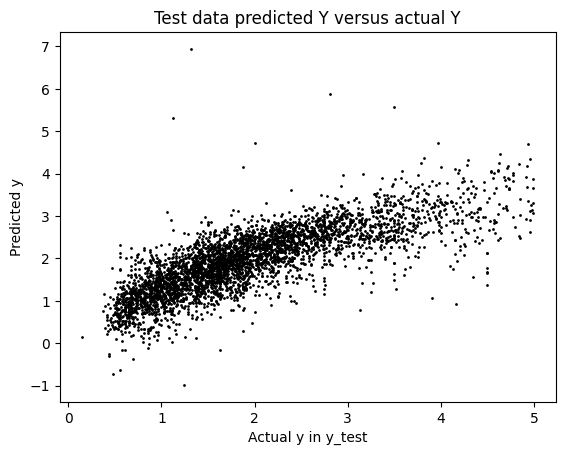

In [24]:
### A scatterplot may be clearer - here matplotlib
plt.scatter(y_test, y_pred,s=1,color='black')
plt.title("Test data predicted Y versus actual Y")
plt.xlabel("Actual y in y_test")
plt.ylabel("Predicted y")
plt.show()

Next we show regularized regressions

In [25]:
from sklearn import linear_model
Ridge=linear_model.Ridge(alpha=.05,)
Ridge.fit(X_train, y_train) ### training the algorithm, note regression is done without normalizing the X, y
### To retrieve the intercept:
print('Intercept (train):', Ridge.intercept_)
### To retrieving the slope:
print('Slopes (train):', Ridge.coef_)

from sklearn.metrics import r2_score
y_pred_ridge_train = Ridge.predict(X_train)
### Fitting y using the x_train data
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

print('R2_score (train): ', r2_score_ridge_train)
### R2_score (train) is the R-square in the linear regression involving only the training data set

Intercept (train): 4.135422663219861
Slopes (train): [ 5.77576796  0.46811197 -8.60567501 12.91551879  1.31684928 -2.67499467
 -3.74630507 -3.96833669]
R2_score (train):  0.6201915481184783


In [26]:
### Predicting R2 Score using Test Set but Intercept(train) and Slopes(train) from Ridge Training results
y_pred_Ridge = Ridge.intercept_ + np.dot(X_test,Ridge.coef_.T)
rmse_y_pred_Ridge = (np.sqrt(mean_squared_error(y_test, y_pred_Ridge)))
def tss(y_test):
    return ((y_test - np.mean(y_test))**2).sum()
R2_pred_Ridge = 1-(3923*(rmse_y_pred_Ridge)**2)/tss(y_test)
print("Pred_RMSE_Ridge:",rmse_y_pred_Ridge)
print("R2_pred_Ridge:",R2_pred_Ridge)

Pred_RMSE_Ridge: 0.6014036364990889
R2_pred_Ridge: 0.6212258568011171


In [27]:
from sklearn import linear_model
Lasso=linear_model.Lasso(alpha=0.005,)
Lasso.fit(X_train, y_train) ### training the algorithm, note regression is done without normalizing the X, y
### To retrieve the intercept:
print('Intercept (train):', Lasso.intercept_)
### To retrieving the slope:
print('Slopes (train):', Lasso.coef_)

from sklearn.metrics import r2_score
y_pred_lasso_train = Lasso.predict(X_train)
### Fitting y using the x_train data
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

print('R2_score (train): ', r2_score_lasso_train)
### R2_score (train) is the R-square in the linear regression involving only the training data set

Intercept (train): 3.1893742341272726
Slopes (train): [ 5.0278467   0.41954709 -0.          0.          0.         -1.93650405
 -2.61040552 -2.64733684]
R2_score (train):  0.591521564978036


In [28]:
### Predicting R2 Score using Test Set but Intercept(train) and Slopes(train) from Lasso Training results
y_pred_Lasso = Lasso.intercept_ + np.dot(X_test,Lasso.coef_.T)
rmse_y_pred_Lasso = (np.sqrt(mean_squared_error(y_test, y_pred_Lasso)))
def tss(y_test):
    return ((y_test - np.mean(y_test))**2).sum()
R2_pred_Lasso = 1-(3923*(rmse_y_pred_Lasso)**2)/tss(y_test)
print("Pred_RMSE_Lasso:",rmse_y_pred_Lasso)
print("R2_pred_Lasso:",R2_pred_Lasso)

Pred_RMSE_Lasso: 0.6219853454966753
R2_pred_Lasso: 0.5948568226196693


Preparing for k-fold Cross-Validation

In [29]:
### We can try reshuffling the X_train,y_train point positions here if we wish
from sklearn.utils import shuffle
X_shuffle, y_shuffle = shuffle(X_train,y_train, random_state=40)
### Rename X_Shuffle y_shuffle
X_train = X_shuffle
y_train = y_shuffle
### shuffle just randomly permutates the rows

In [30]:
### Now k-fold cross validation is to be performed on X_train y_train reshuflled dataset as in [29], leaving test set intact
### Predicting Cross Validation Score 
### By default cross_val_score uses the scoring provided in the given estimator, which is r2 score here
### Details of other scoring methods and metrics can be found in https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn.model_selection import cross_val_score
scoresLinreg = cross_val_score(estimator = Linreg, X = X_train, y = y_train, cv = 5)
### This combined training set X_train, y_train is split into k=5 (cv=5) folds for each of k=1,2,...,5 repetitions
print(scoresLinreg)
### Score is R2 measure, there are 5 scores since k=cv=5, one for each repetition 
print("%0.4f mean R2 with a standard deviation of %0.4f" % (scoresLinreg.mean(), scoresLinreg.std()))

[0.6103278  0.61590082 0.6233678  0.61861227 0.62083429]
0.6178 mean R2 with a standard deviation of 0.0045


In [31]:
### Now k-fold cross validation is to be performed on X_train y_train dataset in [29], leaving test set intact
### Predicting Cross Validation Score 
### By default cross_val_score uses the scoring provided in the given estimator, which is r2 score here

from sklearn import linear_model
Ridge=linear_model.Ridge(alpha=0.05,)
### Do not need to specify Ridge.fit(X_train, y_train) 
### Above steps may be repeated in order to try different hyperparameter of alpha and select one with highest ave R2

from sklearn.model_selection import cross_val_score
scoresRidge = cross_val_score(estimator = Ridge, X = X_train, y = y_train, cv = 5)
### This combined training set X_train, y_train is split into k=5 (cv=5) folds for each of k=1,2,...,5 repetitions
print(scoresRidge)
### Score is R2 measure, there are 5 scores since k=cv=5, one for each repetition 
print("%0.4f mean R2 with a standard deviation of %0.4f" % (scoresRidge.mean(), scoresRidge.std()))

[0.61083575 0.61517579 0.62265187 0.62200811 0.61989958]
0.6181 mean R2 with a standard deviation of 0.0045


In [32]:
### Now k-fold cross validation is to be performed on X_train y_train reshuffled dataset in [29], leaving test set intact
### Predicting Cross Validation Score 
### By default cross_val_score uses the scoring provided in the given estimator, which is r2 score here

from sklearn import linear_model
Lasso=linear_model.Lasso(alpha=0.001,)
### Do not need to specify Lasso.fit(X_train, y_train) 
### Above steps may be repeated in order to try different hyperparameter of alpha and select one with highest ave R2

from sklearn.model_selection import cross_val_score
scoresLasso = cross_val_score(estimator = Lasso, X = X_train, y = y_train, cv = 5)
### This combined training set X_train, y_train is split into k=5 (cv=5) folds for each of k=1,2,...,5 repetitions
print(scoresLasso)
### Score is R2 measure, there are 5 scores since k=cv=5, one for each repetition 
print("%0.4f mean R2 with a standard deviation of %0.4f" % (scoresLasso.mean(), scoresLasso.std()))

[0.60127122 0.60612945 0.61319657 0.62278361 0.60809022]
0.6103 mean R2 with a standard deviation of 0.0073


In [33]:
### In this case, it appears LASSO increases under-fitting and weakens prediction accuracy

In [34]:
X_train.shape,y_train.shape, type(X_train), type(y_train)

((15692, 8), (15692,), pandas.core.frame.DataFrame, pandas.core.series.Series)

In [35]:
### Check
### Note this OLS is just exploratory to find sign effects of coeffs. The t-values may be flawed as the cov matrix may not
###   be homoskedastic

OLSX = df[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]
OLSy = df[['MedHouseVal']]

import statsmodels.api as sm
# adding the constant term
OLSX = sm.add_constant(OLSX)
 
# performing the regression
# and fitting the model
result = sm.OLS(OLSy, OLSX).fit()
 
# printing the summary table
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     4009.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:19:45   Log-Likelihood:                -17755.
No. Observations:               19615   AIC:                         3.553e+04
Df Residuals:                   19606   BIC:                         3.560e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.6951      0.565    -56.106      0.0

In [ ]:
x